In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_url = ('https://raw.githubusercontent.com/Thinkful-Ed/data'
            '-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df_raw = pd.read_csv(data_url)
df_raw.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [4]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
idno,8594.0,39549.380033,626725.940649,1.0,1052.0,1714.0,2745.0,11001431.0
year,8594.0,6.500000,0.500029,6.0,6.0,6.5,7.0,7.0
tvtot,8586.0,3.861985,2.019689,0.0,2.0,4.0,5.0,7.0
ppltrst,8580.0,5.559907,2.233700,0.0,4.0,6.0,7.0,10.0
pplfair,8555.0,6.005143,2.129866,0.0,5.0,6.0,8.0,10.0
pplhlp,8569.0,5.319874,2.173449,0.0,4.0,5.0,7.0,10.0
happy,8563.0,7.694616,1.735904,0.0,7.0,8.0,9.0,10.0
sclmeet,8579.0,5.192563,1.457643,1.0,4.0,6.0,6.0,7.0
sclact,8500.0,2.748941,0.905477,1.0,2.0,3.0,3.0,5.0
gndr,8584.0,1.497204,0.500021,1.0,1.0,1.0,2.0,2.0


In [5]:
df = df_raw.copy()

# I'm going to change a few values so that they're more intuitive
# Change the year from [6, 7] to [2012, 2014]
df.year = df.year.map(lambda x: 2012 if x == 6 else 2014)

# Change the gndr code to binary female value
# Currently, 1 = Male & 2 = Female
df.gndr = df.gndr.map(lambda x: 1 if x == 2.0 else 0)
df.rename(columns = {'gndr':'female'}, inplace=True)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,female,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,1.0


In [6]:
# For reference in later questions
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [7]:
# Which order corresponds to "greater than" in a ttest?
more = [5, 3, 5, 3, 5, 5]
less = [1, 3, 1, 3, 1, 1]
print(stats.ttest_ind(more, less))
print(stats.ttest_ind(less, more))

Ttest_indResult(statistic=4.472135954999578, pvalue=0.0011934668300203268)
Ttest_indResult(statistic=-4.472135954999578, pvalue=0.0011934668300203268)


# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
    * ttest_rel if normal
    * wilcoxon if non-normal

In [8]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,female,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,1.0


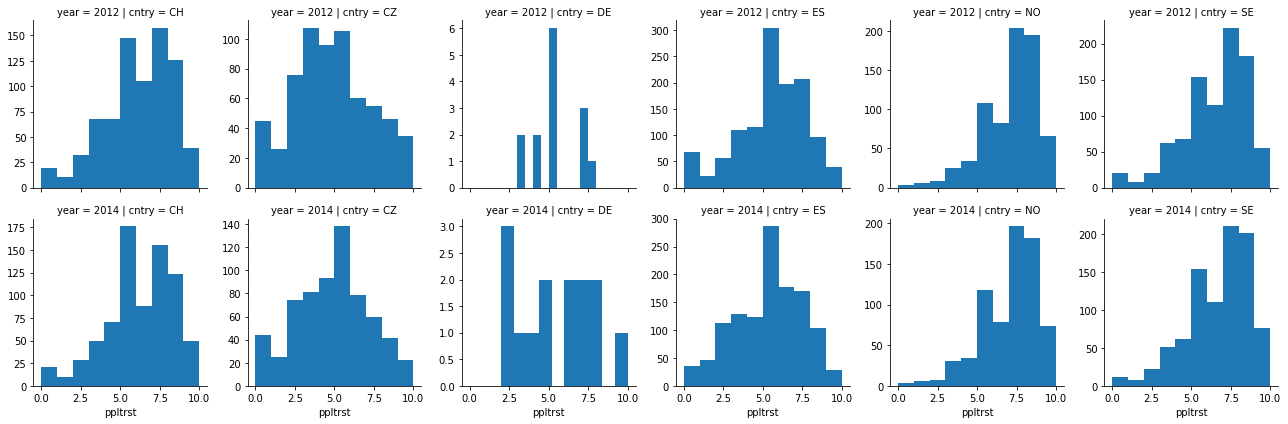

In [9]:
g = sns.FacetGrid(df, col='cntry', row='year', sharey=False)
g = g.map(plt.hist, 'ppltrst')

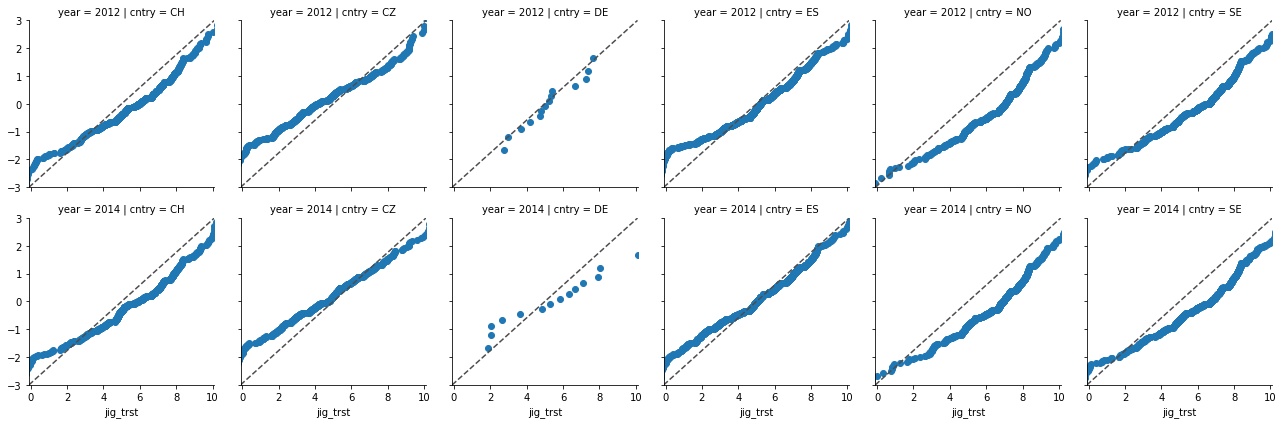

In [10]:
df['jig_trst'] = df.ppltrst.map(lambda x: x+np.random.uniform(-.4, .4))

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    plt.ylim([-3, 3])
    plt.xlim([-0.1, 10.1])
    ax = plt.gca()
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    
g = sns.FacetGrid(df, col='cntry', row='year')
g = g.map(quantile_plot, 'jig_trst')

Yea, none of these really look that normal to me. Let's use non-parametric tests for all of them.

In [11]:
# I wish I knew multi-indexing but I just want to get this done.
print('Country \t\t p-value')
for cntry in df.cntry.unique():
    # Create 2 series with country code
    cntry_2012 = df[(df['year']==2012) & (df['cntry']==cntry)]['ppltrst']
    cntry_2014 = df[(df['year']==2014) & (df['cntry']==cntry)]['ppltrst']
    
#     # Rank the entries
#     ranks = stats.rankdata(cntry_2012.tolist() + cntry_2014.tolist())
    
#     # Reset the series
#     cntry_2012 = ranks[:len(cntry_2012)]
#     cntry_2014 = ranks[len(cntry_2012):]
    
    print('{}: \t\t {}\n'.format(cntry, stats.wilcoxon(cntry_2012, cntry_2014)[1]))


Country 		 p-value
CH: 		 0.4411286510952477

CZ: 		 0.2931891426327379

DE: 		 0.9157134600899863

ES: 		 0.005570829650439684

NO: 		 0.6139175669970661

SE: 		 0.028545290985536906



C:\Users\bretw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\bretw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Not really sure if I should be using the ranks or the actual data for this.

# 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
    * ttest_rel if normal
    * wilcoxon if non-normal

In [12]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,female,agea,partner,jig_trst
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,1.0,3.011845
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,1.0,4.759458
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,2.0,8.082312
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,1.0,5.828476
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,1.0,6.075128


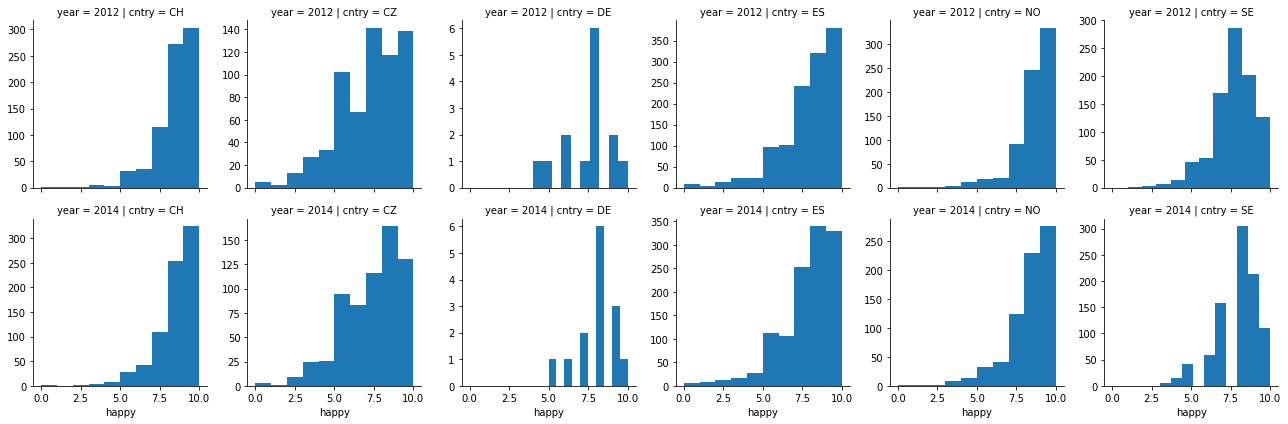

In [13]:
g = sns.FacetGrid(df, col='cntry', row='year', sharey=False)
g = g.map(plt.hist, 'happy')

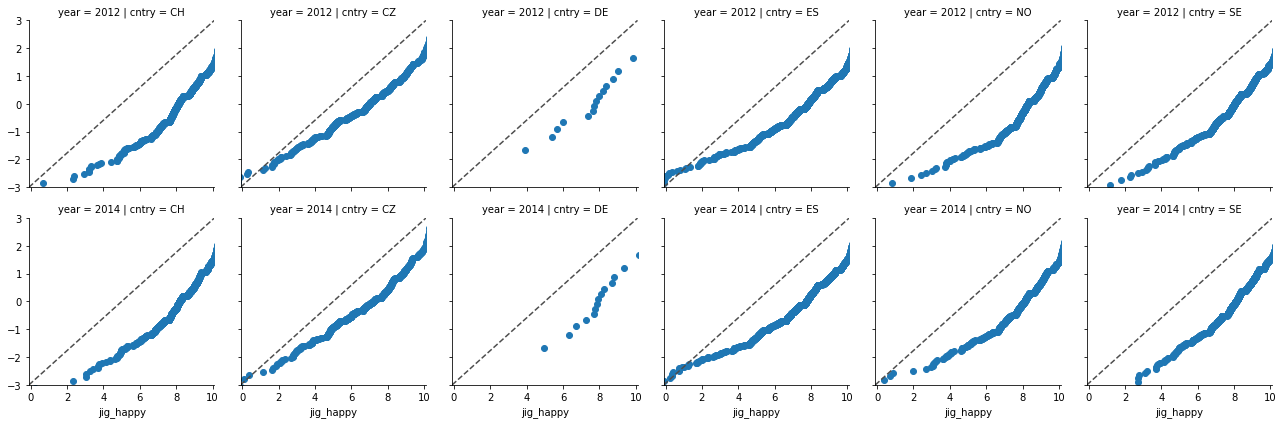

In [14]:
df['jig_happy'] = df.happy.map(lambda x: x+np.random.uniform(-.4, .4))

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    plt.ylim([-3, 3])
    plt.xlim([-0.1, 10.1])
    ax = plt.gca()
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    
g = sns.FacetGrid(df, col='cntry', row='year')
g = g.map(quantile_plot, 'jig_happy')

In [15]:
# Here we go again
print('')
print('Country                p-value')
for cntry in df.cntry.unique():
    # Create 2 series with country code
    cntry_2012 = df[(df['year']==2012) & (df['cntry']==cntry)]['happy']
    cntry_2014 = df[(df['year']==2014) & (df['cntry']==cntry)]['happy']
    
#     # Rank the entries
#     ranks = stats.rankdata(cntry_2012.tolist() + cntry_2014.tolist())
    
#     # Reset the series
#     cntry_2012 = ranks[:len(cntry_2012)]
#     cntry_2014 = ranks[len(cntry_2012):]
    
    print('  {} \t\t {}'.format(cntry, stats.wilcoxon(cntry_2012, cntry_2014)[1]))


Country                p-value
  CH 		 0.8208688161425343
  CZ 		 0.01064243454053068
  DE 		 0.393351316918508
  ES 		 0.04923868084306013
  NO 		 2.7264367804254175e-06
  SE 		 0.5136403441005022


C:\Users\bretw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\bretw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


# 3. Who reported watching more TV in 2012, men or women?
    * ttest_ind if normal
    * mannwhitneyu, median_test, kruskal if non-normal


In [16]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,female,agea,partner,jig_trst,jig_happy
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,1.0,3.011845,8.357991
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,1.0,4.759458,9.103125
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,2.0,8.082312,7.280447
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,1.0,5.828476,10.027086
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,1.0,6.075128,8.087377


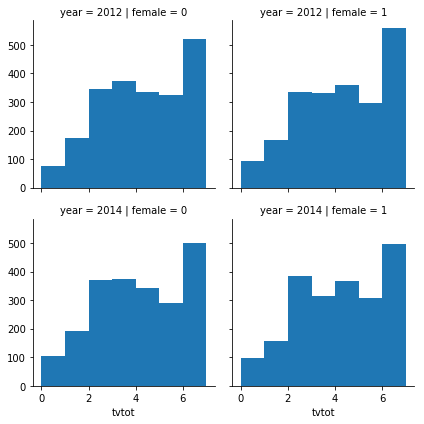

In [17]:
g = sns.FacetGrid(df, col='female', row='year')
g.map(plt.hist, 'tvtot', bins=7)
plt.show()

I checked with df_raw... the data are actually this similar to each other.

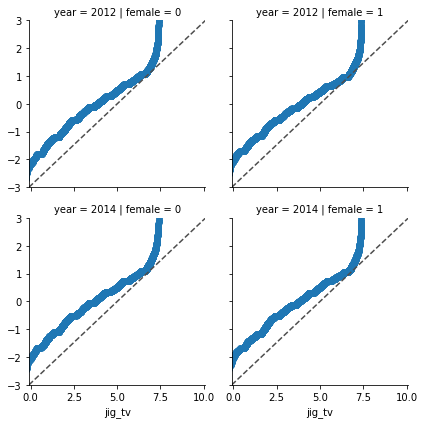

In [18]:
df['jig_tv'] = df.tvtot.map(lambda x: x+np.random.uniform(-.4, .4))

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    plt.ylim([-3, 3])
    plt.xlim([-0.1, 10.1])
    ax = plt.gca()
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    
g = sns.FacetGrid(df, col='female', row='year')
g = g.map(quantile_plot, 'jig_tv')

Looks normal enough to me!

In [19]:
# Remember from the test, the statistic is 
# positive when a > b in ttest_ind(a, b)

female_2012 = df[(df['female']==1) & (df['year']==2012)]['tvtot'].dropna()
male_2012 = df[(df['female']==0) & (df['year']==2012)]['tvtot'].dropna()

stats.ttest_ind(female_2012, male_2012)

Ttest_indResult(statistic=0.6899928109209502, pvalue=0.4902360402696986)

Since we put females into the ttest first and the statistic is positive, we conclude that women watched slightly more tv than men, but not enough for it to be statistically significant. Also, I think we got lucky there that after dropping na, we had the same number of data points.

# 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
    * ttest_ind if normal
    * mannwhitneyu, median_test, kruskal if non-normal

In [20]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,female,agea,partner,jig_trst,jig_happy,jig_tv
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,1.0,3.011845,8.357991,2.900839
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,1.0,4.759458,9.103125,5.928540
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,2.0,8.082312,7.280447,0.852148
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,1.0,5.828476,10.027086,4.230899
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,1.0,6.075128,8.087377,5.352444


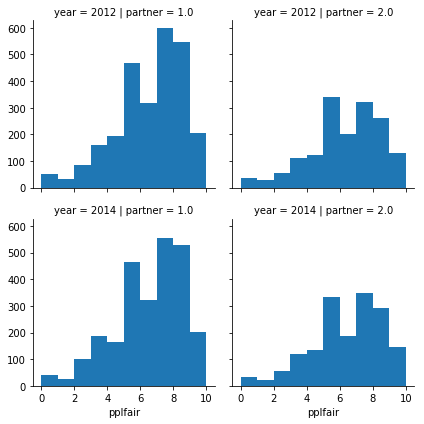

In [21]:
g = sns.FacetGrid(df, col='partner', row='year')
g.map(plt.hist, 'pplfair')
plt.show()

I checked with df_raw... the data are actually this similar to each other.

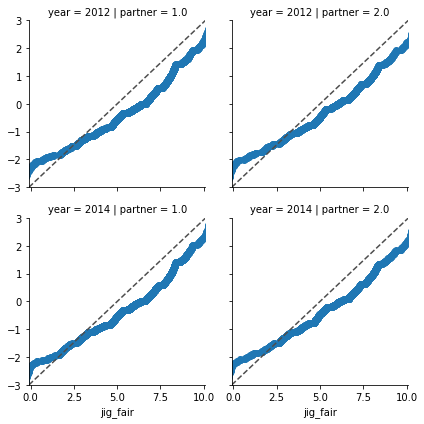

In [22]:
df['jig_fair'] = df.pplfair.map(lambda x: x+np.random.uniform(-.4, .4))

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    plt.ylim([-3, 3])
    plt.xlim([-0.1, 10.1])
    ax = plt.gca()
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    
g = sns.FacetGrid(df, col='partner', row='year')
g = g.map(quantile_plot, 'jig_fair')

Looks normal enough to me!

In [23]:
# Remember from the test, the statistic is 
# positive when a > b in ttest_ind(a, b)
partner_2012 = df[(df['partner']==1) & (df['year']==2012)]['tvtot'].dropna()
alone_2012 = df[(df['partner']==2) & (df['year']==2012)]['tvtot'].dropna()

stats.ttest_ind(female_2012, male_2012)

Ttest_indResult(statistic=0.6899928109209502, pvalue=0.4902360402696986)

We can't really conclude anything here

# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
    * f_oneway if normal
    * median_test or kruskal if non-normal

In [24]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,female,agea,partner,jig_trst,jig_happy,jig_tv,jig_fair
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,1.0,3.011845,8.357991,2.900839,9.666662
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,1.0,4.759458,9.103125,5.928540,7.206306
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,2.0,8.082312,7.280447,0.852148,7.840577
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,1.0,5.828476,10.027086,4.230899,6.176024
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,1.0,6.075128,8.087377,5.352444,7.171492


In [25]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [26]:
# Code golfing with map!
soc_meet = df.apply(lambda x: None if x['cntry'] not in ['CH', 'CZ', 'ES'] else x, 1).dropna()
print(soc_meet.cntry.unique())
soc_meet.head()

['CH' 'CZ' 'ES']


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,female,agea,partner,jig_trst,jig_happy,jig_tv,jig_fair
0,CH,5.0,2012.0,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1.0,60.0,1.0,3.011845,8.357991,2.900839,9.666662
1,CH,25.0,2012.0,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1.0,59.0,1.0,4.759458,9.103125,5.928540,7.206306
2,CH,26.0,2012.0,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0.0,24.0,2.0,8.082312,7.280447,0.852148,7.840577
3,CH,28.0,2012.0,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1.0,64.0,1.0,5.828476,10.027086,4.230899,6.176024
4,CH,29.0,2012.0,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1.0,55.0,1.0,6.075128,8.087377,5.352444,7.171492


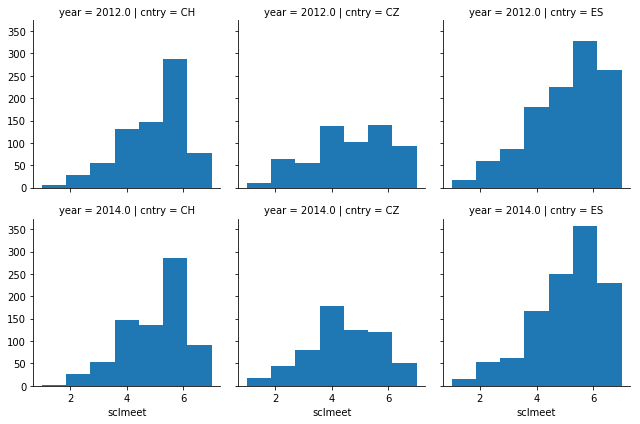

In [27]:
g = sns.FacetGrid(soc_meet, col='cntry', row='year')
g.map(plt.hist, 'sclmeet', bins=7)
plt.show()

I checked with df_raw... the data are actually this similar to each other.

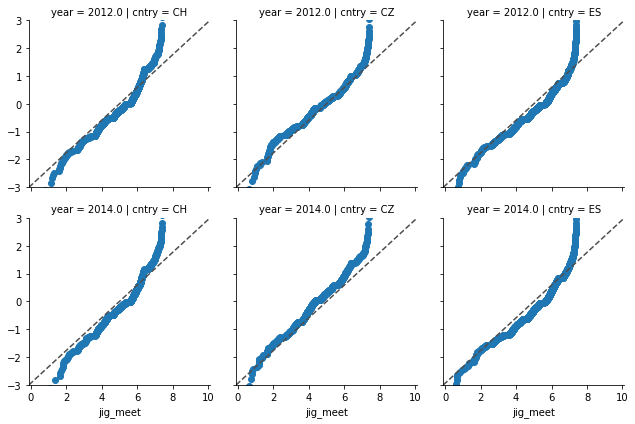

In [28]:
soc_meet['jig_meet'] = soc_meet.sclmeet.map(lambda x: x+np.random.uniform(-.4, .4))

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    plt.ylim([-3, 3])
    plt.xlim([-0.1, 10.1])
    ax = plt.gca()
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    
g = sns.FacetGrid(soc_meet, col='cntry', row='year')
g = g.map(quantile_plot, 'jig_meet')

Looks normal enough to me!

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Can't handle na values here
df.dropna(inplace=True)

variable = 'sclmeet'

cz = df[(df['cntry'] == 'CZ') & (df['year'] == 2014)][variable].tolist()
ch = df[(df['cntry'] == 'CH') & (df['year'] == 2014)][variable].tolist()[:len(cz)]
es = df[(df['cntry'] == 'CH') & (df['year'] == 2014)][variable].tolist()[:len(cz)]

df_cntry = pd.DataFrame()
df_cntry['cz'] = cz
df_cntry['ch'] = ch
df_cntry['es'] = es

values = np.asarray(df_cntry['cz'].tolist() +
                    df_cntry['ch'].tolist() +
                    df_cntry['es'].tolist())


countries = np.array(['Cyprus', 'Switzerland', 'Spain'])
countries = np.repeat(countries, len(cz))

tukey = pairwise_tukeyhsd(endog=values,
                          groups=countries,
                          alpha=0.05)

tukey.summary()


group1,group2,meandiff,lower,upper,reject
Cyprus,Spain,0.7159,0.5345,0.8974,True
Cyprus,Switzerland,0.7159,0.5345,0.8974,True
Spain,Switzerland,0.0,-0.1814,0.1814,False


### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
    * f_oneway if normal
    * median_test or kruskal if non-normal

In [34]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,female,agea,partner,jig_trst,jig_happy,jig_tv,jig_fair
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,1.0,3.011845,8.357991,2.900839,9.666662
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,1.0,4.759458,9.103125,5.928540,7.206306
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,2.0,8.082312,7.280447,0.852148,7.840577
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,1.0,5.828476,10.027086,4.230899,6.176024
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,1.0,6.075128,8.087377,5.352444,7.171492


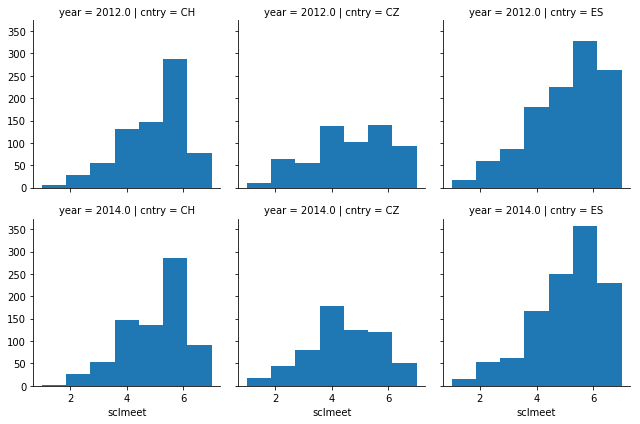

In [27]:
g = sns.FacetGrid(soc_meet, col='cntry', row='year')
g.map(plt.hist, 'sclact', bins=7)
plt.show()

I checked with df_raw... the data are actually this similar to each other.

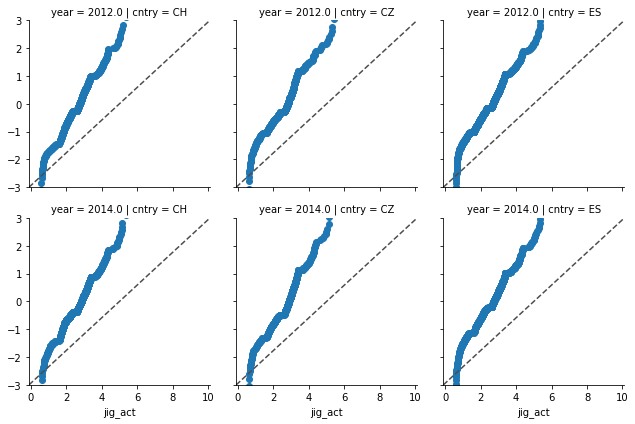

In [35]:
soc_meet['jig_act'] = soc_meet.sclact.map(lambda x: x+np.random.uniform(-.4, .4))

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    plt.ylim([-3, 3])
    plt.xlim([-0.1, 10.1])
    ax = plt.gca()
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    
g = sns.FacetGrid(soc_meet, col='cntry', row='year')
g = g.map(quantile_plot, 'jig_act')

Looks normal enough to me!

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Can't handle na values here
df.dropna(inplace=True)

variable = 'sclact'

cz = df[(df['cntry'] == 'CZ') & (df['year'] == 2014)][variable].tolist()
ch = df[(df['cntry'] == 'CH') & (df['year'] == 2014)][variable].tolist()[:len(cz)]
es = df[(df['cntry'] == 'CH') & (df['year'] == 2014)][variable].tolist()[:len(cz)]

df_cntry = pd.DataFrame()
df_cntry['cz'] = cz
df_cntry['ch'] = ch
df_cntry['es'] = es

values = np.asarray(df_cntry['cz'].tolist() +
                    df_cntry['ch'].tolist() +
                    df_cntry['es'].tolist())


countries = np.array(['Cyprus', 'Switzerland', 'Spain'])
countries = np.repeat(countries, len(cz))

tukey = pairwise_tukeyhsd(endog=values,
                          groups=countries,
                          alpha=0.05)

tukey.summary()


group1,group2,meandiff,lower,upper,reject
Cyprus,Spain,0.0438,-0.0749,0.1626,False
Cyprus,Switzerland,0.0438,-0.0749,0.1626,False
Spain,Switzerland,0.0,-0.1188,0.1188,False
